<a href="https://colab.research.google.com/github/bukovskiy7777/Data-Analysis/blob/main/Test_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set();

# 1. Загальний огляд датасету

In [ ]:
df = pd.read_csv("/content/test_task.csv")
df.head()

,user_id,transaction_id,reference_transaction_id,project,plan_id,transaction_type,status,decline_code,transaction_time,psp_name,payment_method_type,card_brand,card_type,card_level,country,amount_usd,fee_usd
0,u_0001f8a7ee92,t_5cd8aa890853,NaN,Nexora,p_3934,SALE,SUCCESS,NaN,2025-09-15 02:21:44.909000,Global Payments,card,VISA,CREDIT,CLASSIC,US,30.58,0.4234
1,u_0001f8a7ee92,t_a9d478f87372,t_5cd8aa890853,Nexora,p_3934,CAPTURE,SUCCESS,NaN,2025-09-19 20:22:12.437000,Global Payments,card,VISA,CREDIT,CLASSIC,US,0.00,1.1781
2,u_0001f8a7ee92,t_f43e08a529ec,NaN,Nexora,p_3934,SALE,DECLINED,4670.0,2025-09-23 20:20:26.408000,Fiserv,card,VISA,CREDIT,CLASSIC,US,0.00,0.6051
3,u_0001f8a7ee92,t_d1439d0cf4be,NaN,Nexora,p_3934,SALE,DECLINED,4670.0,2025-10-19 15:21:50.706000,Global Payments,card,VISA,CREDIT,CLASSIC,US,0.00,0.4222
4,u_0001f8a7ee92,t_1503c7d7d71a,NaN,Nexora,p_3934,SALE,DECLINED,4670.0,2025-10-20 10:33:51.398000,Global Payments,card,VISA,CREDIT,CLASSIC,US,0.00,0.4217


In [ ]:
df.shape

(463521, 17)

### Аналіз числових значень

In [ ]:
df.describe()

,decline_code,amount_usd,fee_usd
count,139225.000000,463521.000000,463521.00000
mean,5499.071819,20.436060,1.04847
std,2285.438001,31.552938,2.79007
min,31.000000,-145.120000,-2.86080
25%,4670.000000,0.000000,0.08570
50%,4670.000000,0.000000,0.42290
75%,7322.000000,45.880000,1.41100
max,9966.000000,145.120000,63.12250


### Розподіл `amount_usd`

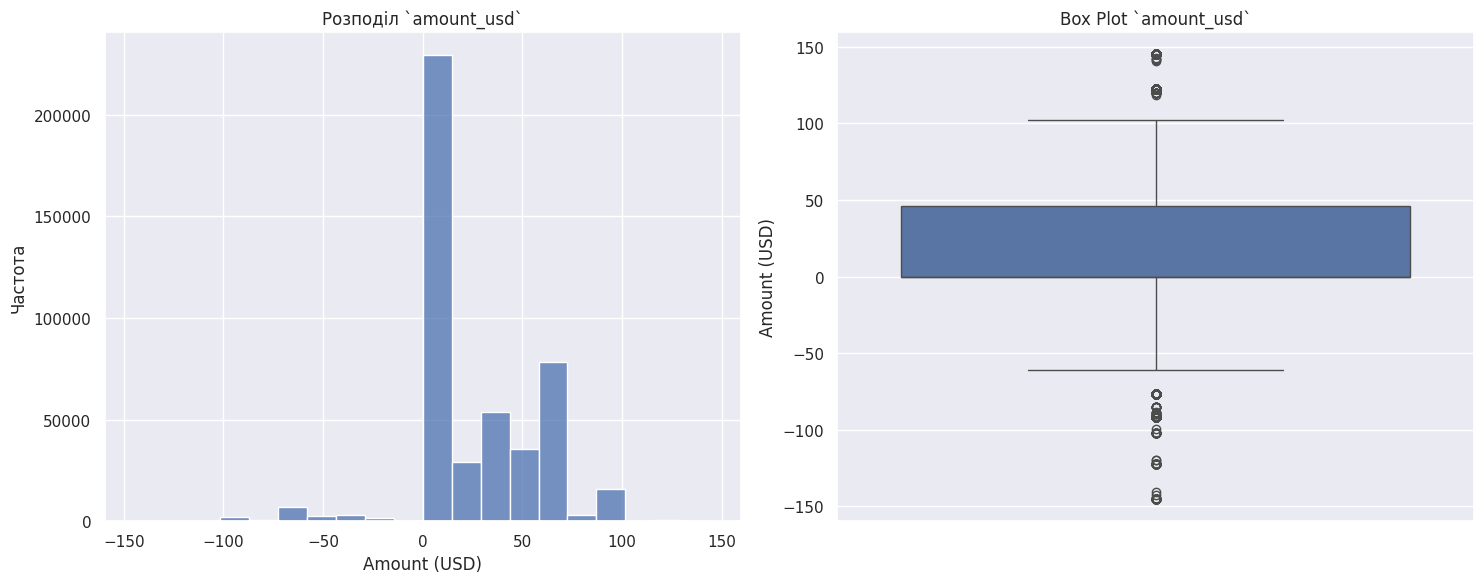

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['amount_usd'], kde=False, bins=20)
plt.title('Розподіл `amount_usd`')
plt.xlabel('Amount (USD)')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['amount_usd'])
plt.title('Box Plot `amount_usd`')
plt.ylabel('Amount (USD)')

plt.tight_layout()
plt.show()

### Розподіл `fee_usd`

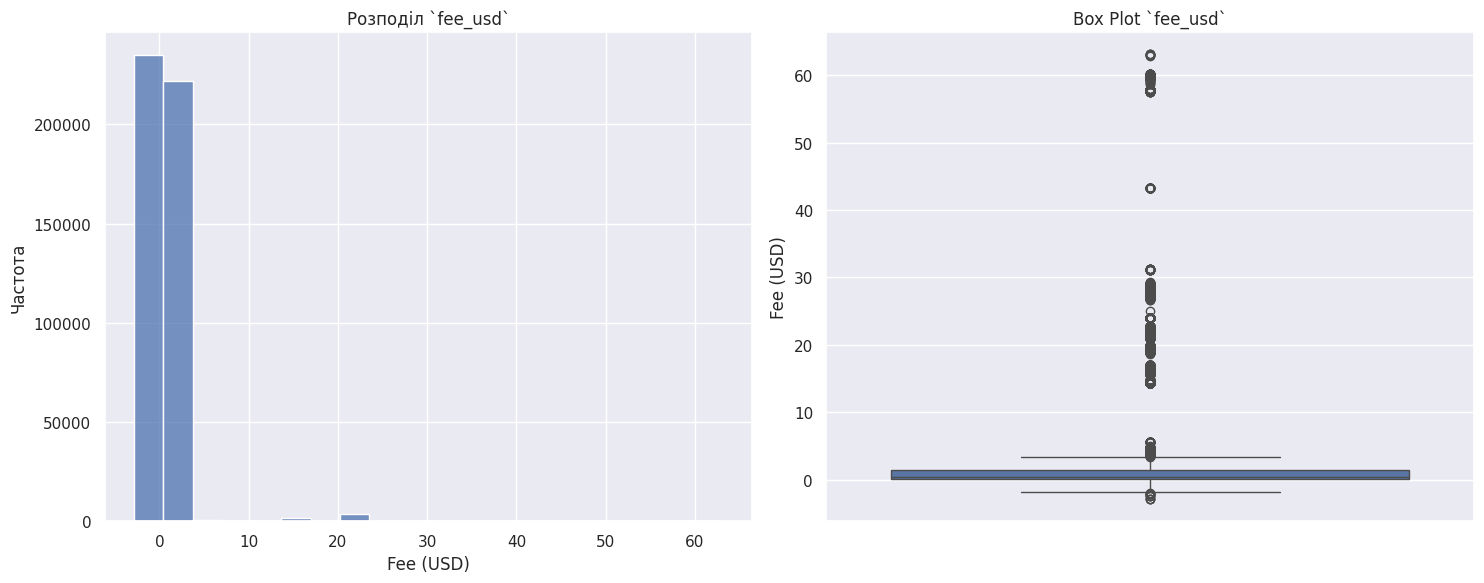

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['fee_usd'], kde=False, bins=20)
plt.title('Розподіл `fee_usd`')
plt.xlabel('Fee (USD)')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['fee_usd'])
plt.title('Box Plot `fee_usd`')
plt.ylabel('Fee (USD)')

plt.tight_layout()
plt.show()

### Унікальність transaction_id

In [ ]:
dupes = df[df.duplicated('transaction_id', keep=False)].sort_values('transaction_id')
len(dupes)

0

transaction_id має тільки унікальні значення

### Аналіз категоріальних стовпців

In [ ]:
df.describe(include=["object"])

,user_id,transaction_id,reference_transaction_id,project,plan_id,transaction_type,status,transaction_time,psp_name,payment_method_type,card_brand,card_type,card_level,country
count,463239,463521,116264,463521,462588,463521,463521,463521,463521,459833,453801,434641,414152,455527
unique,114437,463521,111934,3,48,7,3,462940,7,4,10,3,49,122
top,u_297f52945bab,t_c0cf7c968a46,t_54ad68e488dd,Nexora,p_3934,SALE,SUCCESS,2025-10-30 17:00:00.000000,HSBC,apple_pay,VISA,DEBIT,CLASSIC,US
freq,37,1,11,359197,206464,347031,334150,5,349363,304386,278662,250437,210046,204741


Подивимось, які значення приймають основні категоріальні колонки:

In [ ]:
df["project"].value_counts(dropna=False)

,count
project,
Nexora,359197
Flowvia,66054
Corely,38270


In [ ]:
df["transaction_type"].value_counts(dropna=False)

,count
transaction_type,
SALE,347031
CAPTURE,97881
REFUND,9097
ALERT,5064
VOID,3111
CHARGEBACK,1239
DISPUTE,98


In [ ]:
df["status"].value_counts(dropna=False)

,count
status,
SUCCESS,334150
DECLINED,129269
LOST,102


In [ ]:
df["psp_name"].value_counts(dropna=False)

,count
psp_name,
HSBC,349363
Fiserv,93135
Global Payments,9409
JPMorgan,5130
FIS,3561
Vertex Ltd,2915
Fluxline Inc,8


In [ ]:
df['payment_method_type'].value_counts(dropna=False)

,count
payment_method_type,
apple_pay,304386
card,100489
google_pay,52035
NaN,3688
paypal,2923


In [ ]:
df['card_brand'].value_counts(dropna=False)

,count
card_brand,
VISA,278662
MASTERCARD,152569
AMEX,18337
NaN,9720
DISCOVER,4185
MAESTRO,37
ELOCARD,4
LOCAL CARD,2
MIR,2


In [ ]:
df['card_type'].value_counts(dropna=False)

,count
card_type,
DEBIT,250437
CREDIT,184093
NaN,28880
PREPAID,111


# 2. Аналіз пропущених значень

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463521 entries, 0 to 463520
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   user_id                   463239 non-null  object 
 1   transaction_id            463521 non-null  object 
 2   reference_transaction_id  116264 non-null  object 
 3   project                   463521 non-null  object 
 4   plan_id                   462588 non-null  object 
 5   transaction_type          463521 non-null  object 
 6   status                    463521 non-null  object 
 7   decline_code              139225 non-null  float64
 8   transaction_time          463521 non-null  object 
 9   psp_name                  463521 non-null  object 
 10  payment_method_type       459833 non-null  object 
 11  card_brand                453801 non-null  object 
 12  card_type                 434641 non-null  object 
 13  card_level                414152 non-null  o

In [ ]:
df.isnull().sum()

,0
user_id,282
transaction_id,0
reference_transaction_id,347257
project,0
plan_id,933
transaction_type,0
status,0
decline_code,324296
transaction_time,0
psp_name,0


Частина колонок мають пропущені значення, такі як user_id, plan_id, payment_method_type, country, card_brand, card_type, card_level

### Матриця пропущених значень

<Axes: >

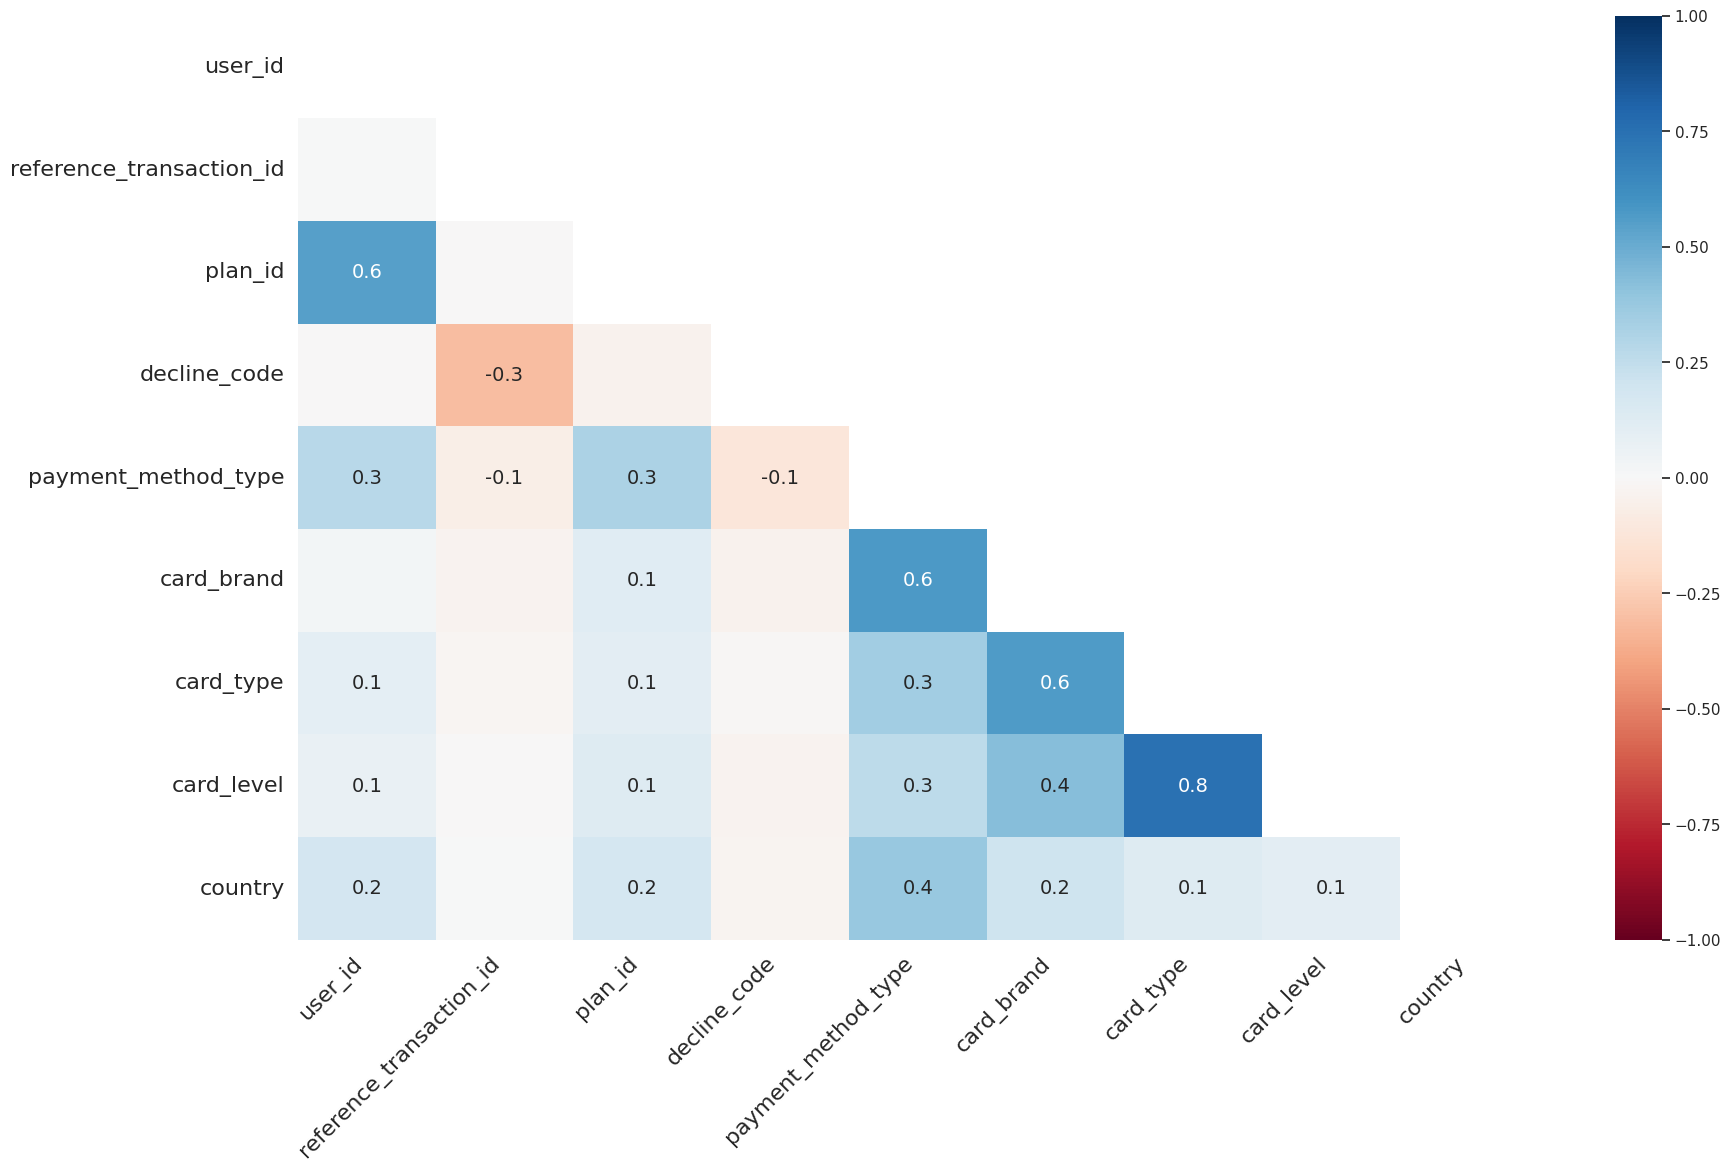

In [ ]:
import missingno as msno
msno.heatmap(df)

### Пропуски reference_transaction_id

In [ ]:
df[df['transaction_type'] != "SALE"].groupby('transaction_type')['reference_transaction_id'].apply(lambda x: x.isna().sum())

,reference_transaction_id
transaction_type,
ALERT,221
CAPTURE,0
CHARGEBACK,5
DISPUTE,0
REFUND,0
VOID,0


присутня невелика кількість пропущених значень reference_transaction_id

### Відсутні значення amount_usd

In [65]:
df[(df['amount_usd'] == 0) & (df['status'] != 'DECLINED')
& (df['transaction_type'] != 'CAPTURE')]['transaction_type'].value_counts()

,count
transaction_type,
ALERT,16
CHARGEBACK,3


є невеличка кількість пропущених даних amount_usd

### Пропуски по групах

In [ ]:
df.groupby('psp_name')[['card_brand','card_type','card_level']].apply(lambda x: x.isna().mean())

,card_brand,card_type,card_level
psp_name,,,
FIS,0.020781,0.082842,0.122718
Fiserv,0.021313,0.043625,0.066677
Fluxline Inc,1.000000,1.000000,1.000000
Global Payments,0.025720,0.026145,0.034754
HSBC,0.012471,0.059586,0.110667
JPMorgan,0.027096,0.104483,0.157700
Vertex Ltd,1.000000,1.000000,1.000000


In [ ]:
df.groupby('payment_method_type')[['card_brand','card_type','card_level']].apply(lambda x: x.isna().mean())

,card_brand,card_type,card_level
payment_method_type,,,
apple_pay,0.009291,0.068006,0.128488
card,0.002637,0.004219,0.017664
google_pay,0.004651,0.022004,0.035995
paypal,1.000000,1.000000,1.000000


видно що є пропуски по платіжному методу paypal в полях ['card_brand','card_type','card_level']

# 3. Аналіз аномалій в даних

### Розподіл amount_usd по transaction_type

In [66]:
def categorize_amount(val):
    if val > 0: return 'Positive (> 0)'
    elif val < 0: return 'Negative (< 0)'
    else: return 'Zero (= 0)'

df_copy = df
df_copy['amount_category'] = df_copy['amount_usd'].apply(categorize_amount)
analysis = pd.crosstab(df_copy['transaction_type'], df_copy['amount_category'], margins=True, margins_name='Total')
display(analysis)

amount_category,Negative (< 0),Positive (> 0),Zero (= 0),Total
transaction_type,,,,
ALERT,4710,0,354,5064
CAPTURE,0,0,97881,97881
CHARGEBACK,1200,0,39,1239
DISPUTE,98,0,0,98
REFUND,8721,0,376,9097
SALE,0,218700,128331,347031
VOID,2990,0,121,3111
Total,17719,218700,227102,463521


Розподіл значень в межах логіки документації

### Які transaction_type є при amount_usd < 0 та fee_usd < 0

In [ ]:
df[df["amount_usd"] < 0]["transaction_type"].value_counts()

,count
transaction_type,
REFUND,8721
ALERT,4710
VOID,2990
CHARGEBACK,1200
DISPUTE,98


в даному випадку нічого не звичайного, підтверджується документація

In [ ]:
df[df["fee_usd"] < 0]["transaction_type"].value_counts()

,count
transaction_type,
DISPUTE,35
CHARGEBACK,2


є 37 аномальних транзакцій, які мають від'ємні значення

### Які status є при decline_code <> NaN

In [ ]:
df[df["decline_code"].notna()]['status'].value_counts(dropna=False)

,count
status,
DECLINED,128811
SUCCESS,10414


### Які transaction_type є при decline_code <> NaN and status == "SUCCESS"

In [ ]:
df[(df["decline_code"].notna()) & (df["status"]=="SUCCESS")]['transaction_type'].value_counts(dropna=False)

,count
transaction_type,
SALE,4292
ALERT,3204
CAPTURE,2035
CHARGEBACK,883


є досить велика кількість транзакцій decline_code <> NaN and status == "SUCCESS", що здається не логічним, проте треба мати детальний опис по decline_code

### Частка SUCCESS / DECLINED / LOST за PSP

In [ ]:
pd.crosstab(df['psp_name'], df['status'], normalize='index').round(4)

status,DECLINED,LOST,SUCCESS
psp_name,,,
FIS,0.1865,0.0000,0.8135
Fiserv,0.3344,0.0000,0.6656
Fluxline Inc,0.0000,1.0000,0.0000
Global Payments,0.4195,0.0000,0.5805
HSBC,0.2654,0.0000,0.7346
JPMorgan,0.1511,0.0000,0.8489
Vertex Ltd,0.0089,0.0322,0.9588


Видно, що всі транзакції Fluxline Inc мають статус LOST

### Перетворення transaction_time на об'єкти datetime

In [68]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'])

df['hour'] = df['transaction_time'].dt.hour
df['dayofweek'] = df['transaction_time'].dt.dayofweek # Monday=0, Sunday=6
df['month'] = df['transaction_time'].dt.to_period('M')
df['weekday'] = df['transaction_time'].dt.day_name()
display(df[['transaction_time', 'hour', 'dayofweek', 'month', 'weekday']].head())

,transaction_time,hour,dayofweek,month,weekday
0,2025-09-15 02:21:44.909,2,0,2025-09,Monday
1,2025-09-19 20:22:12.437,20,4,2025-09,Friday
2,2025-09-23 20:20:26.408,20,1,2025-09,Tuesday
3,2025-10-19 15:21:50.706,15,6,2025-10,Sunday
4,2025-10-20 10:33:51.398,10,0,2025-10,Monday


### Розподіл `fee_usd` та `amount_usd` за днями тижня

In [73]:
print('Статистика `fee_usd` за днями тижня:')
display(df.groupby('dayofweek')['fee_usd'].sum().to_frame().T)

print('\nСтатистика `amount_usd` за днями тижня:')
display(df.groupby('dayofweek')['amount_usd'].sum().to_frame().T)

Статистика `fee_usd` за днями тижня:


dayofweek,0,1,2,3,4,5,6
fee_usd,70258.8644,69261.8345,70684.1668,69165.8603,69108.4937,70003.8086,67505.0519



Статистика `amount_usd` за днями тижня:


dayofweek,0,1,2,3,4,5,6
amount_usd,1366615.22,1346826.08,1348295.06,1341600.87,1365664.99,1346723.72,1356816.93


### Розподіл `fee_usd` та `amount_usd` за годинами доби

In [74]:
print('Статистика `fee_usd` за годинами доби:')
display(df.groupby('hour')['fee_usd'].sum().to_frame().T)

print('\nСтатистика `amount_usd` за годинами доби:')
display(df.groupby('hour')['amount_usd'].sum().to_frame().T)

Статистика `fee_usd` за годинами доби:


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
fee_usd,20225.6438,21320.9623,19806.5879,20332.5104,20567.2391,20943.4345,20683.745,19899.2579,20808.3811,19830.6064,...,20456.7905,20717.9176,19775.3448,19193.1447,19676.2816,19702.622,20472.2683,20423.1639,20020.2645,19913.5152



Статистика `amount_usd` за годинами доби:


hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
amount_usd,395839.64,395036.49,398624.37,392119.73,403675.94,399571.48,403426.23,388326.11,396531.48,393380.41,...,393694.9,393768.9,396368.16,390648.24,388377.05,395838.54,396022.64,394994.17,400281.07,391257.5


### Відношення fee_rate = fee_usd / amount_usd за psp

In [75]:
df['fee_rate'] = df['fee_usd'] / df['amount_usd'].replace(0, np.nan)
df.groupby('psp_name')['fee_rate'].median().sort_values()

,fee_rate
psp_name,
Fluxline Inc,-0.000000
JPMorgan,0.002780
FIS,0.010677
HSBC,0.026321
Fiserv,0.027598
Global Payments,0.027611
Vertex Ltd,0.038003


### Розподіл даних по країнам

<Axes: xlabel='country'>

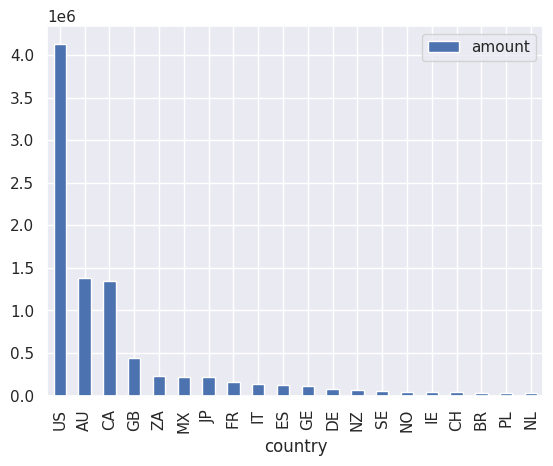

In [ ]:
country = df.groupby('country').agg(tx_count=('transaction_id','count'), amount=('amount_usd','sum')).sort_values('amount', ascending=False).head(20)
country.plot.bar(y='amount')

### Розподіл amount_usd за psp_name та card_brand

In [ ]:
ct = pd.crosstab(df['psp_name'], df['card_brand'], values=df['amount_usd'], aggfunc='sum').fillna(0)
ct

card_brand,AMEX,DISCOVER,ELOCARD,JCB,LOCAL CARD,MAESTRO,MASTERCARD,MIR,RUPAY,VISA
psp_name,,,,,,,,,,
FIS,2867.35,443.48,0.0,0.00,0.0,0.0,19699.50,0.0,0.0,40507.81
Fiserv,44487.12,43526.77,0.0,0.00,0.0,0.0,537358.59,0.0,0.0,1039794.49
Global Payments,13708.47,2148.63,0.0,0.00,0.0,0.0,56086.36,0.0,0.0,79608.49
HSBC,426311.89,47108.51,0.0,45.88,0.0,0.0,2249040.15,0.0,0.0,4609766.33
JPMorgan,5375.25,76.46,0.0,0.00,0.0,0.0,27247.93,0.0,0.0,57909.40


# Висновки